In [1]:
import numpy as np
import sys as sys
import os
import matplotlib.pyplot as plt
import weinzierl_2024_06_12 as weinzierl

# Optional: Create Trajectory Object to Characterize Input Files

In [2]:
name_1   = 'wildtype'
prmtop_1 = '../cr1-model_1_stripped.prmtop'
traj_1   = '../cr1_model_1_aMD_no1_stripped.nc'
start_1  = 1 #position of first residue in overall primary amino acid sequence
# create trajectory object to identify input
experiment_1 = weinzierl.Trajectory(name_1, prmtop_1, traj_1, start_1)

Name of experiment:		 wildtype
Name of .prmtop file:		 ../cr1-model_1_stripped.prmtop
Name of .nc file:		 wildtype
Sequence start position:	 1
Frames: 3735

nGSFSTADQLEMVTELLGGDMVNQSFICDPDDETFIKNIIIQDCMWSGFSAAAKLVSEKLASYQAARKDSGcnGSFSTADQLEMVTELLGGDMVNQSFICDPDDETFIKNIIIQDCMWSGFSAAAKLVSEKLASYQAARKDSGc
Position = 1 - 144 ( 144  aa long ) 




# Create Combinatorial Distance Data

In [3]:
#get user input for region of the protein to be analyzed
start = input ('Enter the position of the first residue: ')
end   = input ('Enter the position of the last residue: ')

f2 = open('distance_' + start + '-' + end + '.cpptraj', 'w')
f2.write('parm ')
f2.write(prmtop_1)
f2.write('\n')
f2.write('trajin ')
f2.write(traj_1)
f2.write('\n')

for position_1 in range (int(start), int(end) + 1):
    for position_2 in range (position_1 + 1, int(end) + 1):
        f2.write('distance :')
        f2.write(str(position_1))
        f2.write(' :')
        f2.write(str(position_2))
        f2.write(' out distance_' + start + '-' + end + '.txt')
        f2.write('\n')
f2.close()

Enter the position of the first residue:  1
Enter the position of the last residue:  144


In [4]:
%%capture
file_name_1 = 'distance_' + str(start) + '-' + str(end) + ('.cpptraj')
print (file_name_1)
!cpptraj < {file_name_1}

# Plot Distance Data

In [5]:
file_name_2 = 'distance_' + start + '-' + end + '.txt'
print ('Loading data from', file_name_2)
result = np.loadtxt(file_name_2)

Loading data from distance_1-144.txt


10296 combinatorial positions analyzed
3735 maximum counts in one spot


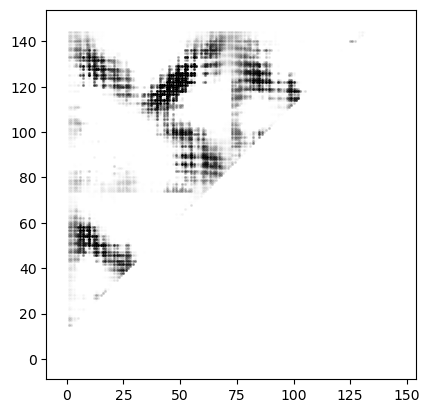

In [6]:
resid_1 = []
resid_2 = []
resid_3 = []

primary_seq_residue_minimum = 12
minimum_distance = 12

count = 0
for position_1 in range (int(start), int(end) + 1):
    for position_2 in range (position_1 + 1, int(end) + 1):
        array = result[:,count] #read in row
        if position_2 - position_1 > primary_seq_residue_minimum:
            constraint = array < minimum_distance # impose minimum distance constraint on structure
            final_result = array[constraint]
            #print (position_1, position_2, len(final_result))
            resid_1.append (position_1)
            resid_2.append (position_2)
            resid_3.append (len(final_result))
        count = count + 1
npa_1 = np.asarray(resid_1)
npa_2 = np.asarray(resid_2)
npa_3 = np.asarray(resid_3)
print (count, 'combinatorial positions analyzed')

#plot data
new = npa_3.astype(float)
divisor = npa_3.max()
print (divisor, 'maximum counts in one spot')
plt.figsize=(10, 10)
plt.axis('square')
plt.xlim (int(start) - 10, int(end) + 10)
plt.ylim (int(start) - 10, int(end) + 10)

for x in range (1, len(resid_3)):
    value = npa_3[x]/divisor # to make sure that alpha does not exceed 1
    plt.scatter(npa_1[x], npa_2[x], alpha = value, s = 1.5, color = 'black')
#plt.scatter(105, 105, marker = '.', alpha = 0.5, s = 2, color = 'blue') #D132 position
#plt.scatter(106, 106, marker = '.', alpha = 0.5, s = 2, color = 'blue') #W135 position
#plt.scatter(132, 132, marker = '.', alpha = 0.5, s = 2, color = 'red') #D132 position
#plt.scatter(135, 135, marker = '.', alpha = 0.5, s = 2, color = 'purple') #W135 position

file_name_3 = 'compaction_contacts_intensity_' + start + '_' + end + '_' + str(primary_seq_residue_minimum) + '-' + str(minimum_distance) + '.png'
plt.savefig(file_name_3, dpi = 300)

# Bubble Plot